In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import neattext.functions as nfx

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [6]:
df = pd.read_csv(r'D:\projects\BEIT\precide\dataset\Suicide_Detection.csv')

In [7]:
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [8]:
df['class'].value_counts()

suicide        116037
non-suicide    116037
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

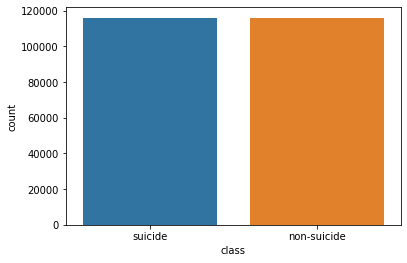

In [9]:
sns.countplot( x = 'class', data = df )

In [10]:
df['cnum'] = df['class'].apply(lambda x: 1 if x == 'suicide' else 0)

In [11]:
df.head()

,Unnamed: 0,text,class,cnum
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,1
1,3,Am I weird I don't get affected by compliments...,non-suicide,0
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,0
3,8,i need helpjust help me im crying so hard,suicide,1
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,1


C:\Users\Niraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnum', ylabel='Density'>

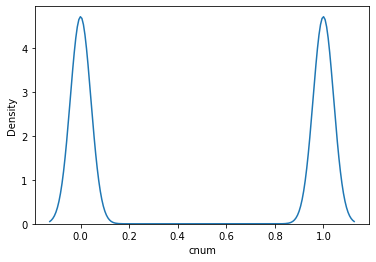

In [12]:
sns.distplot(df['cnum'],hist=False)

In [13]:
df['Clean_text'] = df['text'].apply(nfx.remove_userhandles)

In [14]:
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_stopwords)

In [15]:
Xfeatures = df['Clean_text']
ylabels = df['class']

In [16]:
df.head()

,Unnamed: 0,text,class,cnum,Clean_text
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,1,Ex Wife Threatening SuicideRecently left wife ...
1,3,Am I weird I don't get affected by compliments...,non-suicide,0,weird affected compliments coming know irl fee...
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,0,"Finally 2020 over... hear ""2020 bad year"" agai..."
3,8,i need helpjust help me im crying so hard,suicide,1,need helpjust help im crying hard
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,1,"I’m lostHello, Adam (16) I’ve struggling years..."


In [17]:
x_train, x_test, y_train, y_test = train_test_split( Xfeatures , ylabels , test_size = 0.2 ,random_state = 42)

In [18]:
from sklearn.pipeline import Pipeline

In [19]:
pipe_lr = Pipeline( steps= [('cv', CountVectorizer()),('lr', LogisticRegression(solver='lbfgs', max_iter=100000))])


In [20]:
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(max_iter=100000))])

In [21]:
pipe_lr.score(x_test,y_test)

0.9352364537326295

In [22]:
snt1 = "I am very despoint with my life i just want to say good bye!"

In [23]:
pipe_lr.classes_

array(['non-suicide', 'suicide'], dtype=object)

In [24]:
pipe_lr.predict_proba([snt1])

array([[0.03085041, 0.96914959]])

In [29]:
pipe_lr.predict([snt1])

array(['suicide'], dtype=object)

In [27]:
import joblib
pipeline_file = open("lr_model.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()